# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [2]:
def show2Images(image, imageKernel):
    _, axs = plt.subplots(1, 2, figsize=(8, 5))

    axs[0].imshow(image)
    axs[0].set_title("Obraz oryginalny")

    axs[1].imshow(imageKernel)
    axs[1].set_title("Obraz po filtracji")
    
    axs[0].axis('off')
    axs[1].axis('off')

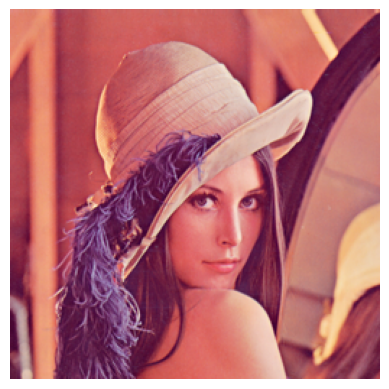

In [3]:
lenaRGB = cv2.imread('lenaRGB.png')
lenaRGB = cv2.cvtColor(lenaRGB, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(lenaRGB)

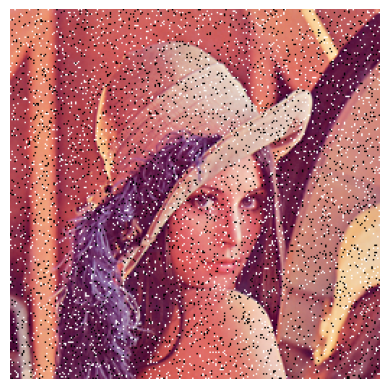

In [4]:
lenaRGBSzum = cv2.imread('lenaRGBSzum.png')
lenaRGBSzum = cv2.cvtColor(lenaRGBSzum, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(lenaRGBSzum)

In [5]:
def FindClosestPixel(W):
    w, h, _= W.shape 
    distances = np.zeros((w, h))

    for a in range(h):
        for b in range(w):
            distances[a, b] = np.sqrt(np.square(W - W[a, b]).sum(axis = -1)).sum()

    index = np.unravel_index(np.argmin(distances), distances.shape)
    return W[index]  

In [6]:
def MedianBlurRGB(image, ksize = 3):
    w, h = image.shape[0], image.shape[1] 
    WS = ksize // 2 
    
    newImage = np.zeros(image.shape, dtype=np.uint8)

    for a in range(WS, h - WS):
        for b in range(WS, w - WS):
            W = image[a-WS:a+WS, b-WS:b+WS].astype(np.int32)
            newImage[a, b] = FindClosestPixel(W)
    #
    return newImage
#

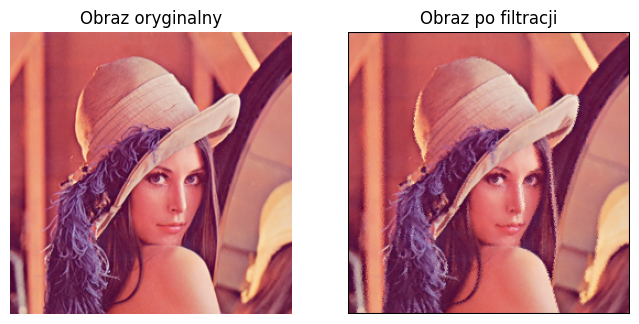

In [7]:
lenaRGBMedian = MedianBlurRGB(lenaRGB)
show2Images(lenaRGB, lenaRGBMedian)

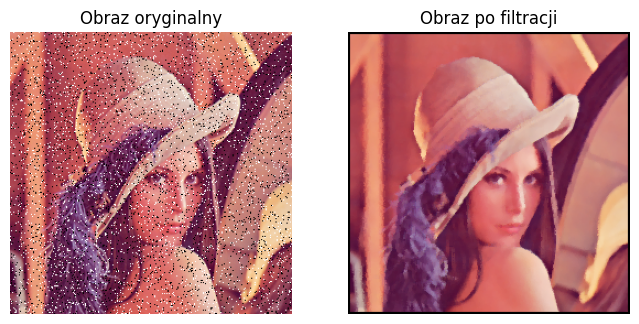

In [8]:
lenaRGBSzumMedian = MedianBlurRGB(lenaRGBSzum, 5)
show2Images(lenaRGBSzum, lenaRGBSzumMedian)